In [55]:
!pip install ts2vg

In [56]:
!pip install igraph

In [57]:
import pandas as pd
import numpy as np
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

In [58]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
#setting directory to access the files
%cd drive/MyDrive/project\ 3

[Errno 2] No such file or directory: 'drive/MyDrive/project 3'
/content/drive/MyDrive/project 3


In [ ]:
#TASK 1

In [60]:

#Creating Lists
Activity = ["walking","running","climbingup","climbingdown"]
Subject = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
Method = [NaturalVG,HorizontalVG]
Axis = ["x","y","z"]

In [61]:
#Creating empty dataframe with colnames
Col_Names = ["Method","Subject","Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity"]
df_task1=pd.DataFrame(columns=Col_Names)

In [62]:

#for loop to access files for each subjects and append the data to dataframe
for S in Subject:
  for A in Activity:
    Filename = "acc_"+A+"_chest_p"+S+".csv"
    df = pd.read_csv(Filename)
    for a in Axis:
      for m in Method:
        temp_df=df["attr_"+a][1000:2024]
        g=m()
        g.build(temp_df)
        ig_m = g.as_igraph()
        temp2 ={"Method":m.__name__,"Subject":S,"Accelerometer Axis":a,"Average Degree":np.mean(ig_m.degree()),
        "Network Diameter":ig_m.diameter(),"Average Path Length":ig_m.average_path_length(),"Activity":A}
        df_task1 = df_task1.append(temp2, ignore_index=True)



In [63]:
df_task1

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity
0,NaturalVG,1,x,11.451172,10,4.441492,walking
1,HorizontalVG,1,x,3.958984,26,11.578024,walking
2,NaturalVG,1,y,11.986328,9,4.241050,walking
3,HorizontalVG,1,y,3.951172,22,10.666252,walking
4,NaturalVG,1,z,8.570312,10,4.897722,walking
...,...,...,...,...,...,...,...
355,HorizontalVG,15,x,3.951172,33,13.926625,climbingdown
356,NaturalVG,15,y,14.156250,15,5.840334,climbingdown
357,HorizontalVG,15,y,3.941406,31,13.582100,climbingdown
358,NaturalVG,15,z,8.955078,10,4.692059,climbingdown


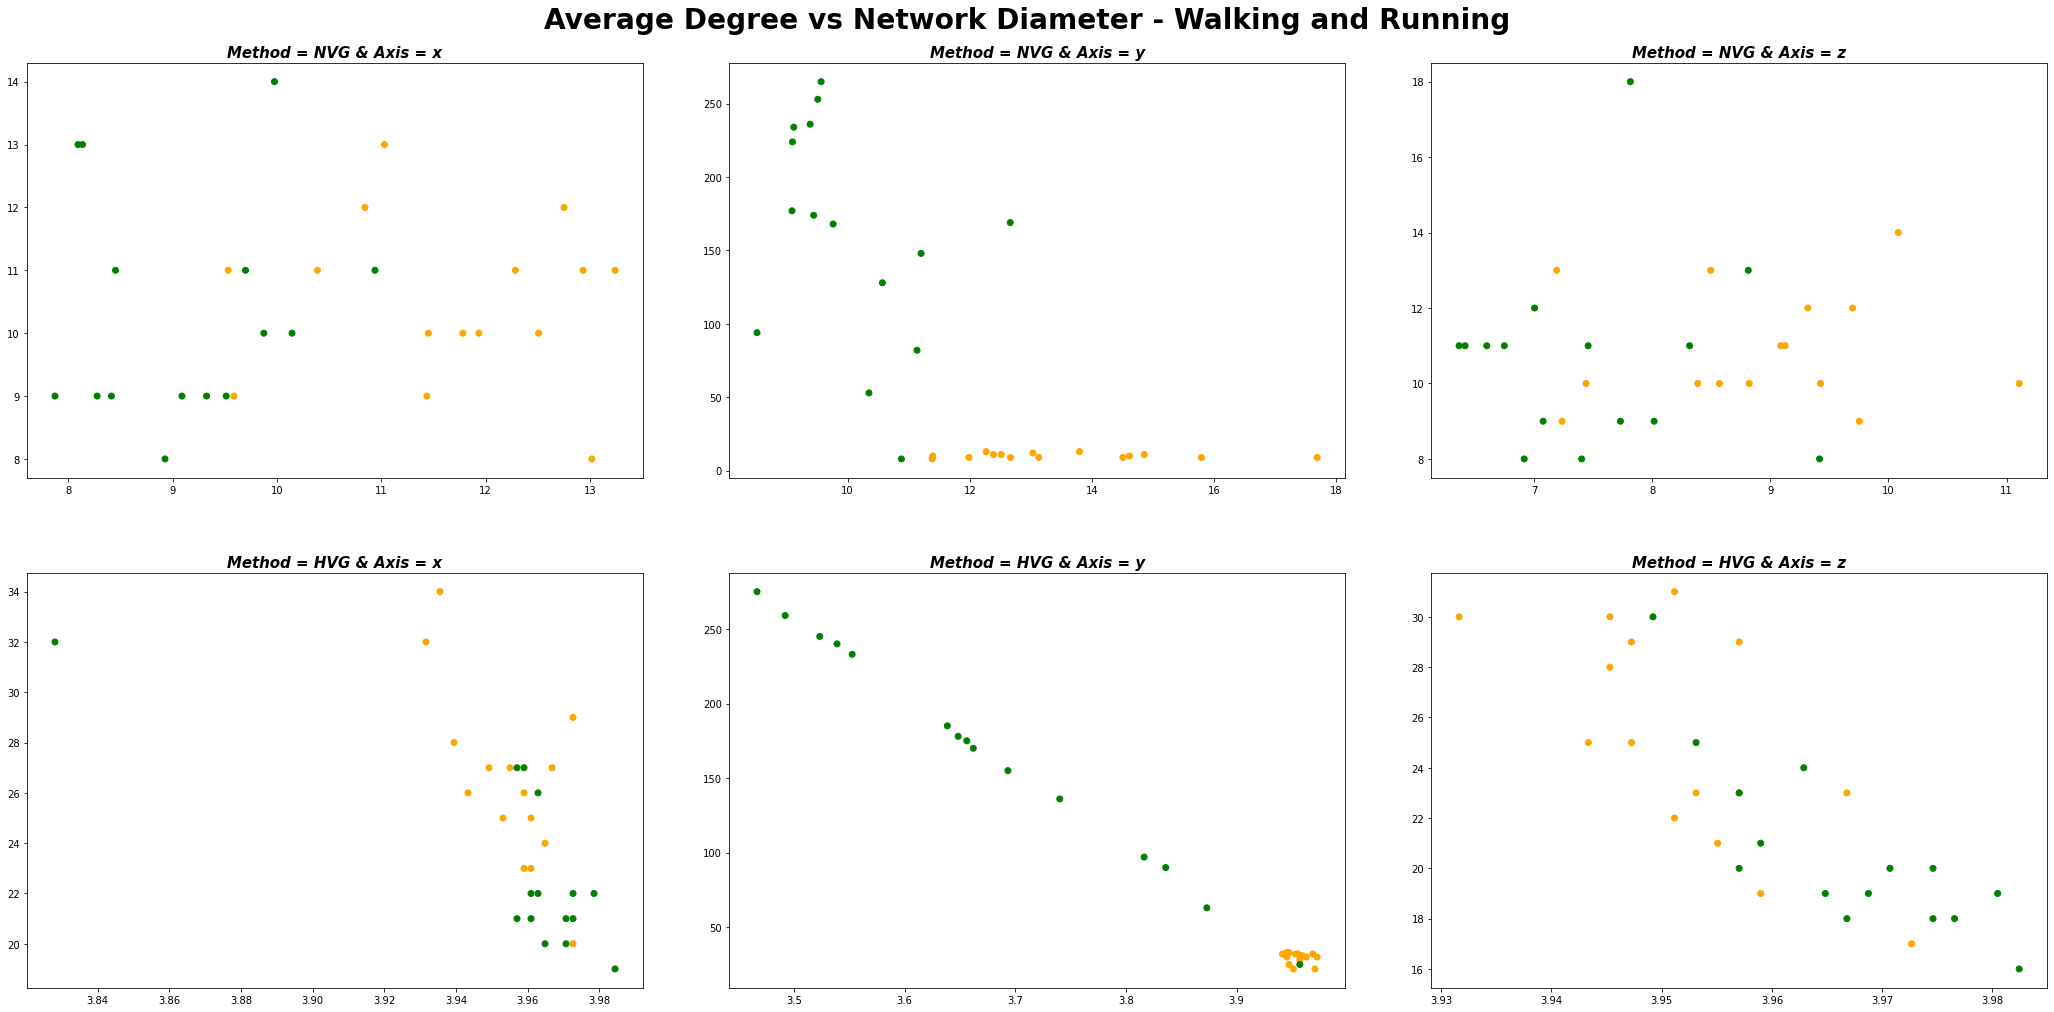

In [64]:
#Scatterplots for Walking and Running
#Creating subplots and title
plot,axis = plt.subplots(2,3,figsize=(30,15))
plot.suptitle("Average Degree vs Network Diameter - Walking and Running",size=28, weight="bold", color="black")

#Colors for different activities
color={"walking":"orange","running":"green"}

#Plot1
df=df_task1[((df_task1["Activity"]=="walking")|(df_task1["Activity"]=="running")) &
            (df_task1["Method"]=="NaturalVG")&
            (df_task1["Accelerometer Axis"]=="x")]

axis[0,0].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[0,0].set_title('Method = NVG & Axis = x', fontstyle='italic',size=15, weight="bold", color="black")

#Plot2
df=df_task1[((df_task1["Activity"]=="walking")|(df_task1["Activity"]=="running")) &
            (df_task1["Method"]=="NaturalVG")&
            (df_task1["Accelerometer Axis"]=="y")]

axis[0,1].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[0,1].set_title('Method = NVG & Axis = y', fontstyle='italic',size=15, weight="bold", color="black")


#Plot3
df=df_task1[((df_task1["Activity"]=="walking")|(df_task1["Activity"]=="running")) &
            (df_task1["Method"]=="NaturalVG")&
            (df_task1["Accelerometer Axis"]=="z")]

axis[0,2].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[0,2].set_title('Method = NVG & Axis = z', fontstyle='italic',size=15, weight="bold", color="black")


#Plot4
df=df_task1[((df_task1["Activity"]=="walking")|(df_task1["Activity"]=="running")) &
            (df_task1["Method"]=="HorizontalVG")&
            (df_task1["Accelerometer Axis"]=="x")]

axis[1,0].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[1,0].set_title('Method = HVG & Axis = x', fontstyle='italic',size=15, weight="bold", color="black")


#Plot5
df=df_task1[((df_task1["Activity"]=="walking")|(df_task1["Activity"]=="running")) &
            (df_task1["Method"]=="HorizontalVG")&
            (df_task1["Accelerometer Axis"]=="y")]

axis[1,1].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[1,1].set_title('Method = HVG & Axis = y', fontstyle='italic',size=15, weight="bold", color="black")


#Plot6
df=df_task1[((df_task1["Activity"]=="walking")|(df_task1["Activity"]=="running")) &
            (df_task1["Method"]=="HorizontalVG")&
            (df_task1["Accelerometer Axis"]=="z")]

axis[1,2].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[1,2].set_title('Method = HVG & Axis = z', fontstyle='italic',size=15, weight="bold", color="black")

plot.tight_layout(pad=6.0)
plot.show()

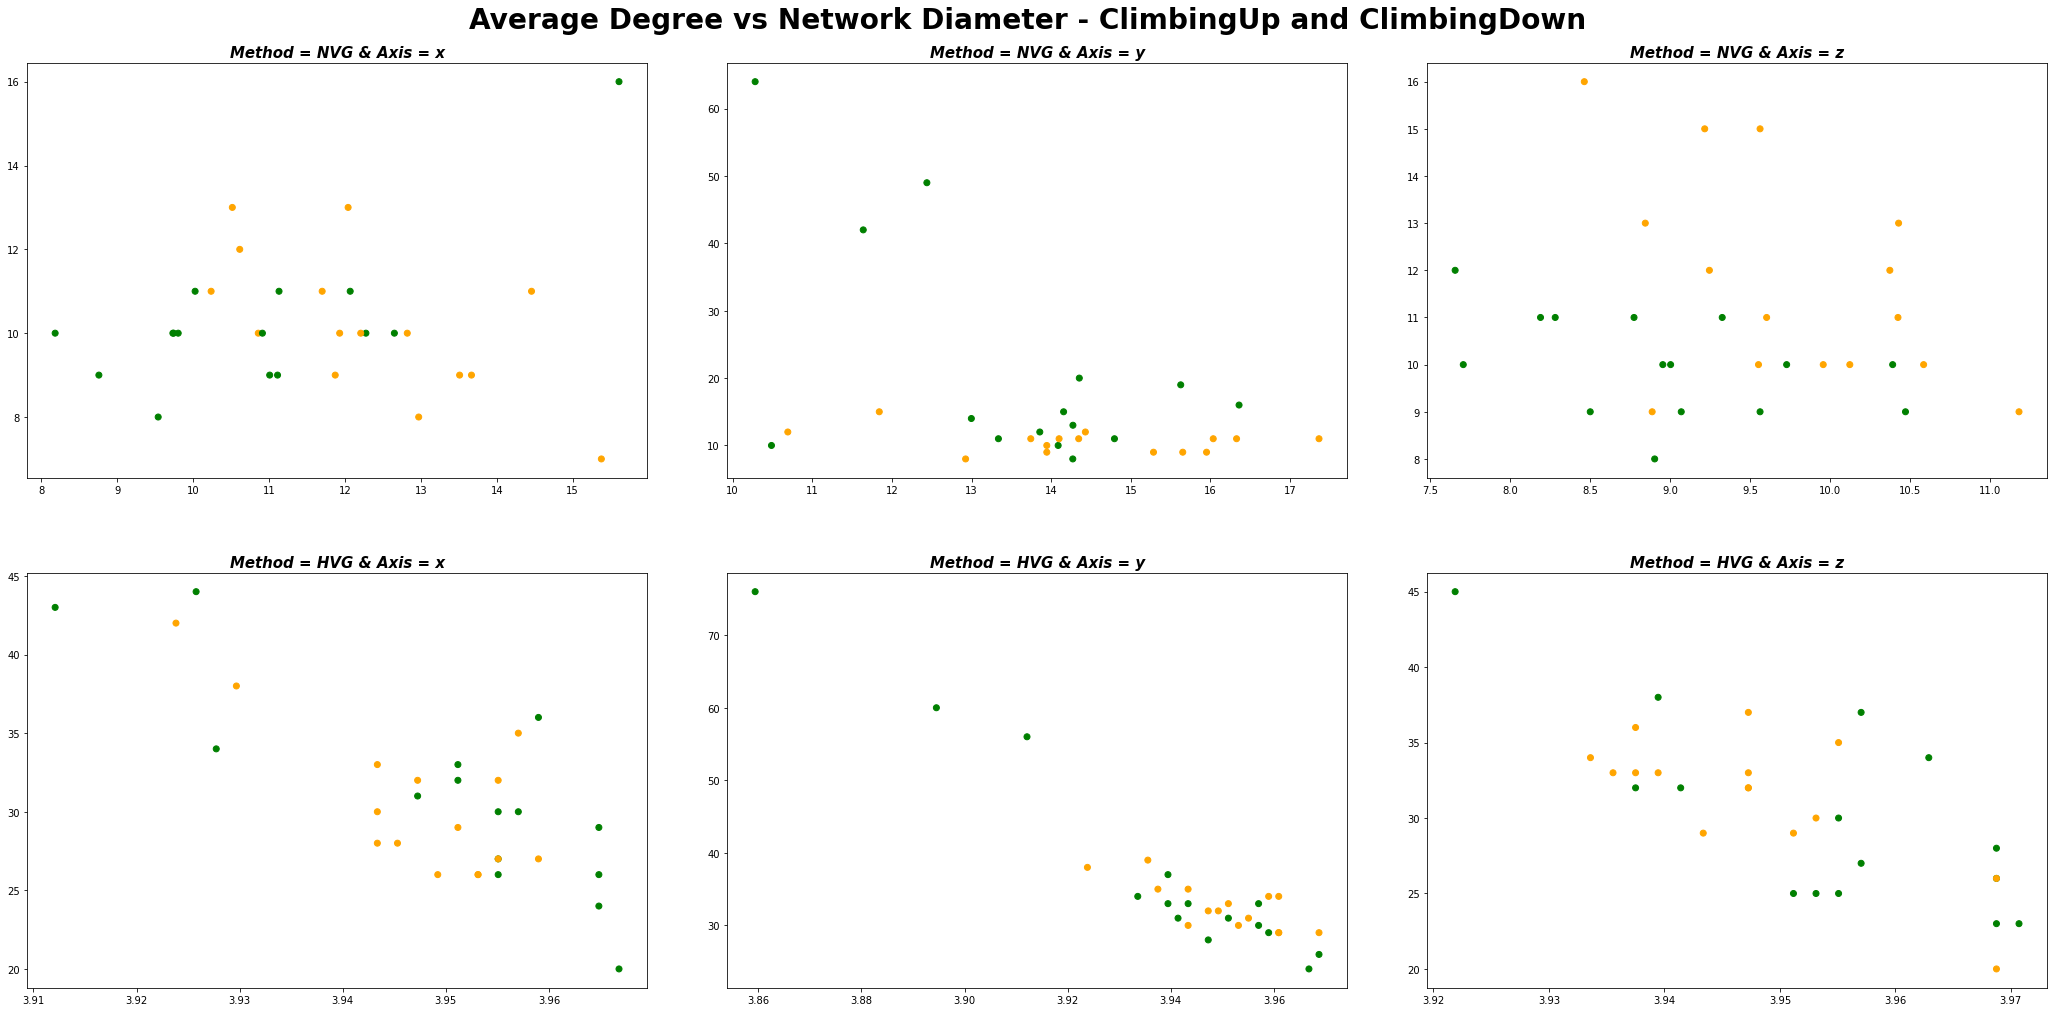

In [65]:
#Scatterplots for ClimbingUp and ClimbingDown
#Creating subplots and title
plot,axis = plt.subplots(2,3,figsize=(30,15))
plot.suptitle("Average Degree vs Network Diameter - ClimbingUp and ClimbingDown",size=28, weight="bold", color="black")

#Colors for different activities
color={"climbingup":"orange","climbingdown":"green"}

#Plot1
df=df_task1[((df_task1["Activity"]=="climbingup")|(df_task1["Activity"]=="climbingdown")) &
            (df_task1["Method"]=="NaturalVG")&
            (df_task1["Accelerometer Axis"]=="x")]

axis[0,0].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[0,0].set_title('Method = NVG & Axis = x', fontstyle='italic',size=15, weight="bold", color="black")                


#Plot2
df=df_task1[((df_task1["Activity"]=="climbingup")|(df_task1["Activity"]=="climbingdown")) &
            (df_task1["Method"]=="NaturalVG")&
            (df_task1["Accelerometer Axis"]=="y")]

axis[0,1].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[0,1].set_title('Method = NVG & Axis = y', fontstyle='italic',size=15, weight="bold", color="black")

#Plot3
df=df_task1[((df_task1["Activity"]=="climbingup")|(df_task1["Activity"]=="climbingdown")) &
            (df_task1["Method"]=="NaturalVG")&
            (df_task1["Accelerometer Axis"]=="z")]

axis[0,2].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[0,2].set_title('Method = NVG & Axis = z', fontstyle='italic',size=15, weight="bold", color="black")

#Plot4
df=df_task1[((df_task1["Activity"]=="climbingup")|(df_task1["Activity"]=="climbingdown")) &
            (df_task1["Method"]=="HorizontalVG")&
            (df_task1["Accelerometer Axis"]=="x")]

axis[1,0].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[1,0].set_title('Method = HVG & Axis = x', fontstyle='italic',size=15, weight="bold", color="black")

#Plot5
df=df_task1[((df_task1["Activity"]=="climbingup")|(df_task1["Activity"]=="climbingdown")) &
            (df_task1["Method"]=="HorizontalVG")&
            (df_task1["Accelerometer Axis"]=="y")]

axis[1,1].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[1,1].set_title('Method = HVG & Axis = y', fontstyle='italic',size=15, weight="bold", color="black")

#Plot6
df=df_task1[((df_task1["Activity"]=="climbingup")|(df_task1["Activity"]=="climbingdown")) &
            (df_task1["Method"]=="HorizontalVG")&
            (df_task1["Accelerometer Axis"]=="z")]

axis[1,2].scatter(x=df["Average Degree"],
                  y=df["Network Diameter"],
                  c=df["Activity"].map(color))
axis[1,2].set_title('Method = HVG & Axis = z', fontstyle='italic',size=15, weight="bold", color="black")

plot.tight_layout(pad=6.0)
plot.show()